Import Packages

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib
import seaborn as sns

Load Data

In [10]:
anime = pd.read_csv (r'C:/Users/Hanna Bohannon/Documents/DSO105C/DSO105C Datasets/anime.csv')
anime.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012


Data Wrangling

In [4]:
anime.dropna(inplace = True)

Single Sample t-Test

Is a Rating Score of 6.2 Different from the Mean in this Dataset?

Test Assumption: Normal Distribution

<AxesSubplot:>

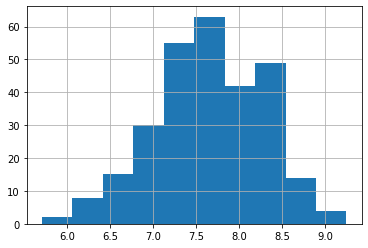

In [5]:
anime['score'].hist()

Run the Analysis

In [6]:
stats.ttest_1samp(anime['score'],6.2)

Ttest_1sampResult(statistic=39.40626105964426, pvalue=1.7928730897960434e-116)

In [7]:
anime.score.mean()

7.659645390070922

Independent t-Test

Does Anime that is Still Airing Differ in Popularity from Anime that is No Longer Airing?

Test Assumption: Normal Distribution

In [8]:
pd.set_option("display.max_columns",None)

<AxesSubplot:>

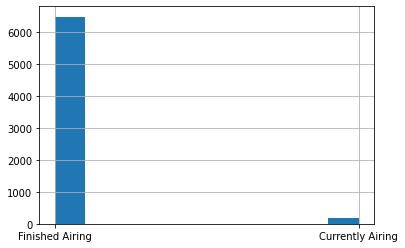

In [20]:
anime.status.hist()

<AxesSubplot:>

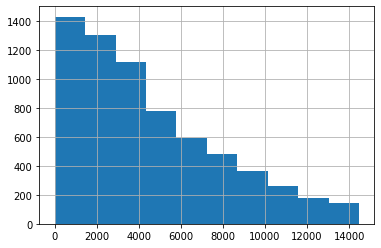

In [21]:
anime.popularity.hist()

Run the Analysis

In [26]:
ttest_ind(anime.status[anime.popularity == 'C'], anime.status[anime.popularity == 'F'])

Ttest_indResult(statistic=nan, pvalue=nan)

Independent Chi-Square

Create a Contingency Table

In [15]:
anime_crosstab = pd.crosstab(anime['status'], anime['popularity'])

In [16]:
stats.chi2_contingency(anime_crosstab)

(5631.457890915424,
 0.9819490167318295,
 5856,
 array([[0.02744451, 0.02744451, 0.02744451, ..., 0.02744451, 0.02744451,
         0.02744451],
        [0.97255549, 0.97255549, 0.97255549, ..., 0.97255549, 0.97255549,
         0.97255549]]))

Correlation

In [12]:
anime['popularity'].corr(anime['rank'])

0.7773024303272644

In [13]:
anime.corr(method='pearson')

,anime_id,episodes,airing,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
anime_id,1.000000,-0.109610,0.223734,-0.223733,-0.046057,0.274671,0.205813,-0.032301,-0.054066,-0.205838,0.623290
episodes,-0.109610,1.000000,-0.037289,0.076875,0.068544,-0.049064,-0.009545,0.079572,0.106804,-0.105711,-0.147920
airing,0.223734,-0.037289,1.000000,-0.066910,-0.046482,0.100467,0.079229,-0.030711,-0.004717,-0.086957,0.142681
score,-0.223733,0.076875,-0.066910,1.000000,0.381926,-0.898747,-0.688492,0.415626,0.256094,0.298989,0.042159
scored_by,-0.046057,0.068544,-0.046482,0.381926,1.000000,-0.356686,-0.425719,0.987107,0.793949,0.046203,0.110892
rank,0.274671,-0.049064,0.100467,-0.898747,-0.356686,1.000000,0.777302,-0.391524,-0.208503,-0.294528,-0.063543
popularity,0.205813,-0.009545,0.079229,-0.688492,-0.425719,0.777302,1.000000,-0.474798,-0.210745,-0.159596,-0.236951
members,-0.032301,0.079572,-0.030711,0.415626,0.987107,-0.391524,-0.474798,1.000000,0.781565,0.039457,0.135725
favorites,-0.054066,0.106804,-0.004717,0.256094,0.793949,-0.208503,-0.210745,0.781565,1.000000,0.002669,0.031254
duration_min,-0.205838,-0.105711,-0.086957,0.298989,0.046203,-0.294528,-0.159596,0.039457,0.002669,1.000000,-0.183812


Use sns.heatmap()

<AxesSubplot:>

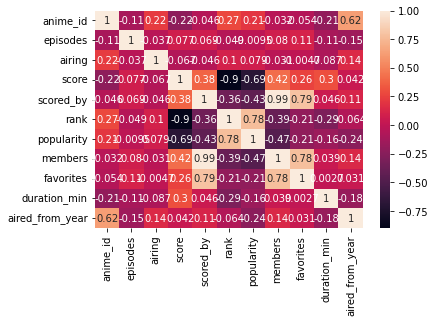

In [14]:
sns.heatmap(anime.corr(), annot=True)